<p style="font-family: Trebuchet MS; line-height: 2; font-size: 24px; font-weight: bold; letter-spacing: 2px; text-align: center; color: #b20710">🍁 TPS SEPTEMBER 2021 🍂</p>

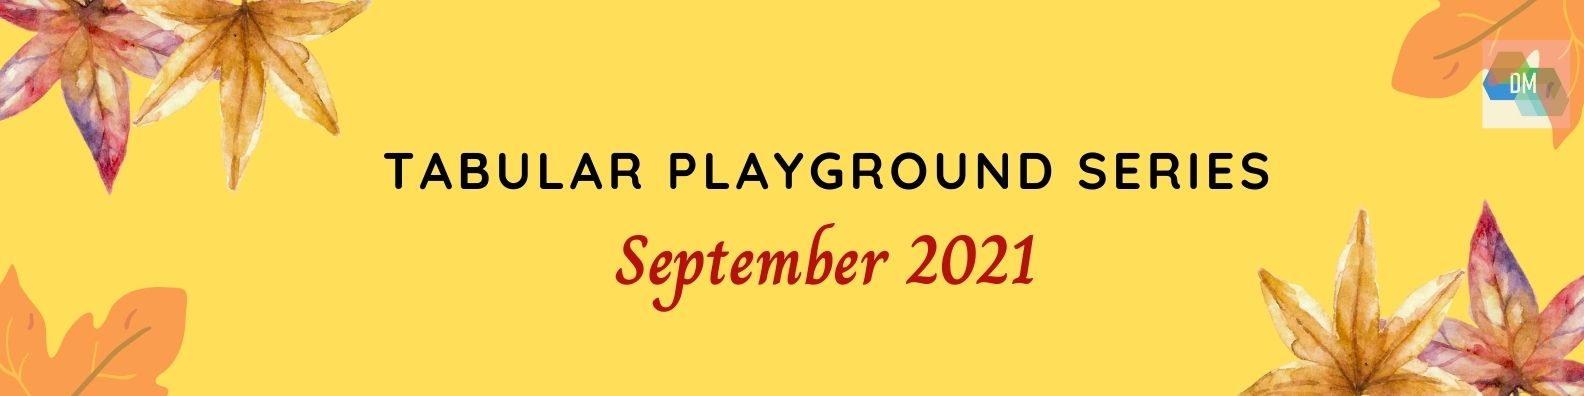

<p style = "font-family: Trebuchet MS; font-size: 16px; color: rgba(0,0,0,.7)"> Observations on this TPS: <li>1. 'claim' column is the target variable </li> <li>2. Train dataset has 957,919 rows and 120 columns</li><li>3. Test dataset has 493,474 rows and 119 columns</li><li>4. In train dataset, every feature has nearly 15,000 missing values totalling 1,820,782 in all</li><li>5. In test dataset, every feature has almost 7,800 missing values totalling 936,218 in all</li></p>

<h3 style="font-family: Trebuchet MS;background-color:#ffc501;color:brown;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;"><strong><centre>Importing Libraries & Packages 📚 </centre></strong></h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid_spec

import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score

import warnings
warnings.filterwarnings('ignore')

<h3 style="font-family: Trebuchet MS;background-color:#ffc501;color:brown;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;"><strong><centre>Importing & Reading the dataset 📝 </centre></strong></h3>

In [2]:
df_train= pd.read_csv("../input/tabular-playground-series-sep-2021/train.csv")
df_test= pd.read_csv("../input/tabular-playground-series-sep-2021/test.csv")
df_subm= pd.read_csv("../input/tabular-playground-series-sep-2021/sample_solution.csv")

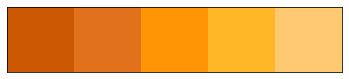

In [3]:
#Custom Color Palette 🎨
custom_colors = ["#CC5803","#E2711D","#FF9505","#FFB627","#FFC971"]
customPalette = sns.set_palette(sns.color_palette(custom_colors))
sns.palplot(sns.color_palette(custom_colors),size=1.2)
plt.tick_params(axis='both', labelsize=0, length = 0)

In [4]:
df_train_row_count, df_train_column_count=df_train.shape
print('Total number of rows (Train):', df_train_row_count)
print('Total number of columns (Train):', df_train_column_count)

Total number of rows (Train): 957919
Total number of columns (Train): 120


In [5]:
df_test_row_count, df_test_column_count=df_test.shape
print('Total number of rows (Test):', df_test_row_count)
print('Total number of columns (Test):', df_test_column_count)

Total number of rows (Test): 493474
Total number of columns (Test): 119


In [6]:
df_train.dtypes

id         int64
f1       float64
f2       float64
f3       float64
f4       float64
          ...   
f115     float64
f116     float64
f117     float64
f118     float64
claim      int64
Length: 120, dtype: object

In [7]:
df_train.head()

id       f1        f2         f3        f4       f5        f6       f7  \
0   0  0.10859  0.004314    -37.566  0.017364  0.28915 -10.25100   135.12   
1   1  0.10090  0.299610  11822.000  0.276500  0.45970  -0.83733  1721.90   
2   2  0.17803 -0.006980    907.270  0.272140  0.45948   0.17327  2298.00   
3   3  0.15236  0.007259    780.100  0.025179  0.51947   7.49140   112.51   
4   4  0.11623  0.502900   -109.150  0.297910  0.34490  -0.40932  2538.90   

         f8            f9  ...     f110    f111     f112      f113      f114  \
0  168900.0  3.992400e+14  ... -12.2280  1.7482  1.90960  -7.11570   4378.80   
1  119810.0  3.874100e+15  ... -56.7580  4.1684  0.34808   4.14200    913.23   
2  360650.0  1.224500e+13  ...  -5.7688  1.2042  0.26290   8.13120  45119.00   
3  259490.0  7.781400e+13  ... -34.8580  2.0694  0.79631 -16.33600   4952.40   
4   65332.0  1.907200e+15  ... -13.6410  1.5298  1.14640  -0.43124   3856.50   

     f115          f116    f117     f118  claim  
0  1.2096  8.613400e+14   140.1  1.01770      1  
1  1.2464  7.575100e+15  1861.0  0.28359      0  
2  1.1764  3.218100e+14  3838.2  0.40690      1  
3  1.1784  4.533000e+12  4889.1  0.51486      1  
4  1.4830 -8.991300e+12     NaN  0.23049      1  

[5 rows x 120 columns]

In [8]:
df_train.describe().T

count          mean           std           min           25%  \
id     957919.0  4.789590e+05  2.765275e+05  0.000000e+00  2.394795e+05   
f1     942672.0  9.020086e-02  4.356374e-02 -1.499100e-01  7.022700e-02   
f2     942729.0  3.459637e-01  1.462507e-01 -1.904400e-02  2.830500e-01   
f3     942428.0  4.068744e+03  6.415829e+03 -9.421700e+03  4.184300e+02   
f4     942359.0  2.012140e-01  2.125103e-01 -8.212200e-02  3.508650e-02   
...         ...           ...           ...           ...           ...   
f115   942360.0  1.208876e+00  1.149588e-01  9.052700e-01  1.146800e+00   
f116   942330.0  4.276905e+16  6.732441e+16 -8.944400e+15  2.321100e+14   
f117   942512.0  3.959205e+03  3.155992e+03 -4.152400e+02  1.306200e+03   
f118   942707.0  5.592672e-01  4.084261e-01 -1.512400e-01  2.765600e-01   
claim  957919.0  4.984920e-01  4.999980e-01  0.000000e+00  0.000000e+00   

                50%           75%           max  
id     4.789590e+05  7.184385e+05  9.579180e+05  
f1     9.013500e-02  1.165000e-01  4.151700e-01  
f2     3.891000e-01  4.584500e-01  5.189900e-01  
f3     1.279500e+03  4.444400e+03  3.954400e+04  
f4     1.370000e-01  2.971000e-01  1.319900e+00  
...             ...           ...           ...  
f115   1.177200e+00  1.242000e+00  1.886700e+00  
f116   1.327500e+16  5.278700e+16  3.249900e+17  
f117   3.228000e+03  6.137900e+03  1.315100e+04  
f118   4.734400e-01  7.462100e-01  2.743600e+00  
claim  0.000000e+00  1.000000e+00  1.000000e+00  

[120 rows x 8 columns]

In [9]:
df_test.describe().T

count          mean           std           min           25%  \
id    493474.0  1.204656e+06  1.424538e+05  9.579190e+05  1.081287e+06   
f1    485662.0  9.019114e-02  4.353777e-02 -1.531900e-01  7.021100e-02   
f2    485583.0  3.461425e-01  1.458888e-01 -1.906000e-02  2.836600e-01   
f3    485679.0  4.047202e+03  6.383225e+03 -9.436300e+03  4.188350e+02   
f4    485741.0  2.015029e-01  2.125533e-01 -8.071600e-02  3.516900e-02   
...        ...           ...           ...           ...           ...   
f114  485532.0  6.305129e+04  9.227903e+04 -8.138100e+04  2.474875e+03   
f115  485497.0  1.209049e+00  1.150736e-01  9.007000e-01  1.146800e+00   
f116  485391.0  4.284258e+16  6.743966e+16 -7.749400e+15  2.317850e+14   
f117  485711.0  3.968586e+03  3.161273e+03 -4.162400e+02  1.310000e+03   
f118  485589.0  5.587338e-01  4.084724e-01 -1.869600e-01  2.767600e-01   

               50%           75%           max  
id    1.204656e+06  1.328024e+06  1.451392e+06  
f1    9.017300e-02  1.165075e-01  4.129000e-01  
f2    3.889400e-01  4.583100e-01  5.198800e-01  
f3    1.277900e+03  4.421400e+03  3.984100e+04  
f4    1.373500e-01  2.971600e-01  1.310200e+00  
...            ...           ...           ...  
f114  1.942900e+04  8.830950e+04  5.215400e+05  
f115  1.177200e+00  1.242300e+00  1.877900e+00  
f116  1.330400e+16  5.284700e+16  3.239500e+17  
f117  3.237100e+03  6.157300e+03  1.319800e+04  
f118  4.737900e-01  7.449700e-01  2.732000e+00  

[119 rows x 8 columns]

In [10]:
display(df_train.info())
display(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957919 entries, 0 to 957918
Columns: 120 entries, id to claim
dtypes: float64(118), int64(2)
memory usage: 877.0 MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493474 entries, 0 to 493473
Columns: 119 entries, id to f118
dtypes: float64(118), int64(1)
memory usage: 448.0 MB


None

<p style="font-family: Trebuchet MS; line-height: 2; font-size: 16px; font-weight: bold; letter-spacing: 2px; text-align: center; color: #CC5803">Except the target column which is of int64 datatype, all the other features are of float64 datatype.</p>

<h3 style="font-family: Trebuchet MS;background-color:#ffc501;color:brown;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;"><strong><centre>Checking for missing values ✏️ </centre></strong></h3>

In [11]:
df_train.isna().sum()

id           0
f1       15247
f2       15190
f3       15491
f4       15560
         ...  
f115     15559
f116     15589
f117     15407
f118     15212
claim        0
Length: 120, dtype: int64

In [12]:
df_test.isna().sum()

id         0
f1      7812
f2      7891
f3      7795
f4      7733
        ... 
f114    7942
f115    7977
f116    8083
f117    7763
f118    7885
Length: 119, dtype: int64

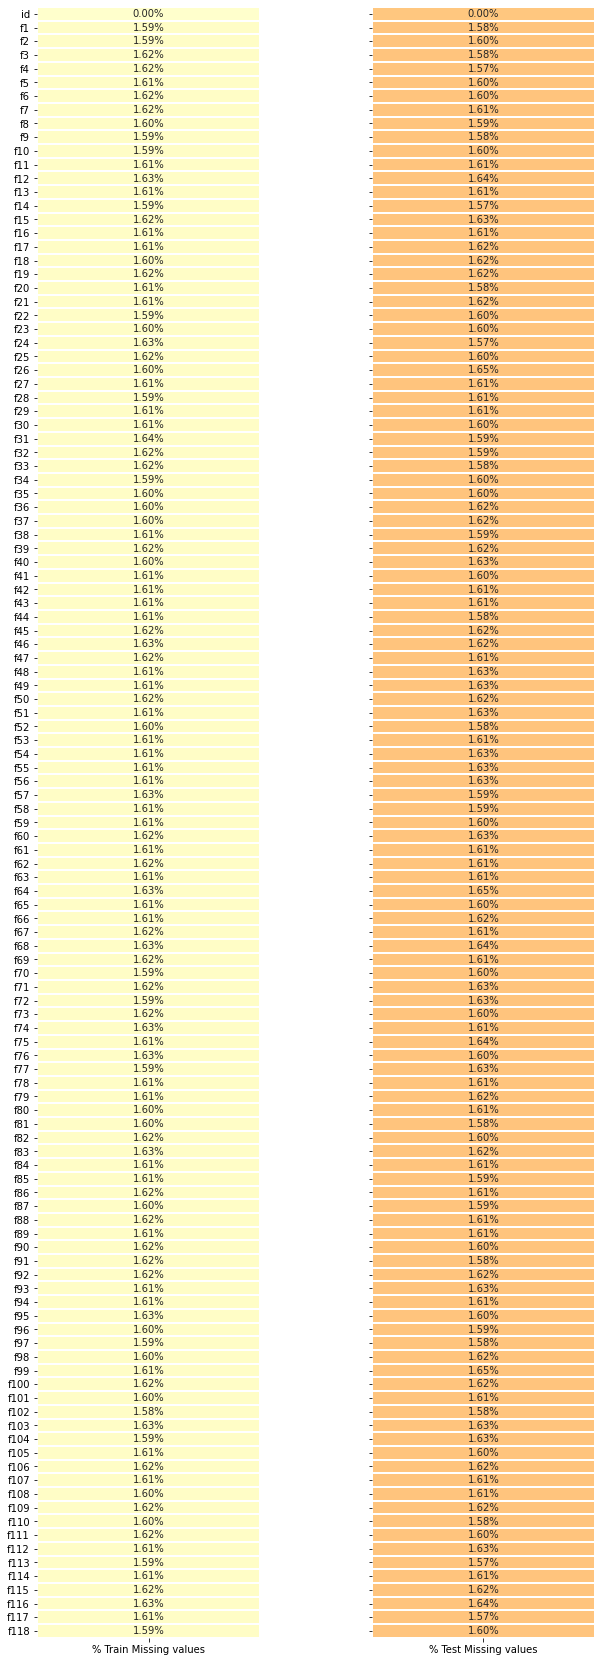

In [13]:
background_color = 'white'
missing = pd.DataFrame(columns=['% Train Missing values'],data=df_train.isnull().sum()/len(df_train))
missing.drop(['claim'],inplace=True)
missing_tst = pd.DataFrame(columns=['% Test Missing values'],data=df_test.isnull().sum()/len(df_test))
fig = plt.figure(figsize=(10, 30),facecolor=background_color)
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
for s in ["right", "top","bottom","left"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)
sns.heatmap(missing,cbar=False,annot=True,fmt=".2%", linewidths=2,cmap='YlOrRd',vmax=1, ax=ax0)
sns.heatmap(missing_tst,cbar=False,annot=True,fmt=".2%", linewidths=2,cmap='copper_r',vmax=1, ax=ax1)
ax1.set_yticklabels([])
plt.show()

<p style="font-family: Trebuchet MS; line-height: 2; font-size: 16px; font-weight: bold; letter-spacing: 2px; text-align: center; color: #CC5803">For the training dataset, every feature has nearly 15,000 missing values totalling 1,820,782 in all and for testing dataset, every feature has almost 7,800 missing values totalling 936,218 in all</p></p>
  

In [14]:
print ("Unique values are:\n",df_train.nunique())

Unique values are:
 id       957919
f1       147965
f2       117427
f3       274624
f4       265618
          ...  
f115      12970
f116     336136
f117     200080
f118     164263
claim         2
Length: 120, dtype: int64


In [15]:
df_train.claim.value_counts()

0    480404
1    477515
Name: claim, dtype: int64

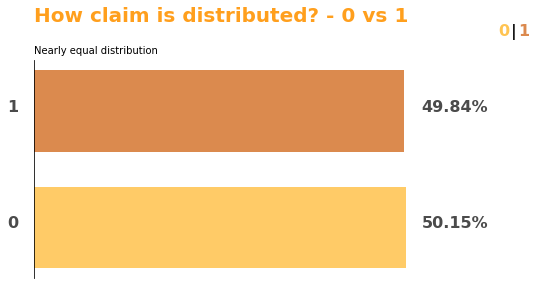

In [16]:
x = df_train['claim'].value_counts()

fig,ax=plt.subplots(figsize=(7,4))
ax.barh([1],x.values[1],height=0.7,color='#CC5803',alpha=0.7)
plt.text(-35000,1, '1', {'font': 'Trebuchet MS','weight':'bold','Size': '16','style':'normal', 'color':'black'},alpha = 0.7)
plt.text(500000,1, '49.84%', {'font': 'Trebuchet MS','weight':'bold','Size': '16','style':'normal', 'color':'black'},alpha = 0.7)

ax.barh([0],x.values[0],height=0.7,color='#FFB627',alpha=0.7)
plt.text(-35000,0,'0',{'font': 'Trebuchet MS','weight':'bold','Size': '16','style':'normal', 'color':'black'}, alpha = 0.7)
plt.text(500000,0, '50.15%',{'font': 'Trebuchet MS','weight':'bold','Size': '16','style':'normal', 'color':'black'}, alpha = 0.7)


plt.text(-50,1.77, 'How claim is distributed? - 0 vs 1',{'font': 'Trebuchet MS','weight':'bold','Size': '20','style':'normal', 'color':'#FF9505'}, alpha = 0.9)
plt.text(600000,1.65, '0 ', {'font': 'Trebuchet MS','weight':'bold','Size': '16','style':'normal', 'color':'#FFB627'},alpha = 0.8)
plt.text(615000,1.65, '|', {'font': 'Trebuchet MS','weight':'bold','Size': '16','style':'normal', 'color':'black'}, alpha = 0.9)
plt.text(625000,1.65, '1',  {'font': 'Trebuchet MS','weight':'bold','Size': '16','style':'normal', 'color':'#CC5803'},alpha = 0.7)
plt.text(-50,1.5, 'Nearly equal distribution')

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

<p style="font-family: Trebuchet MS; line-height: 2; font-size: 16px; font-weight: bold; letter-spacing: 2px; text-align: center; color: #CC5803">We can see that the number of people that not claim and claim are almost the same of 480,404 and 477,515, respectively (i.e.around 50%)</p>
  

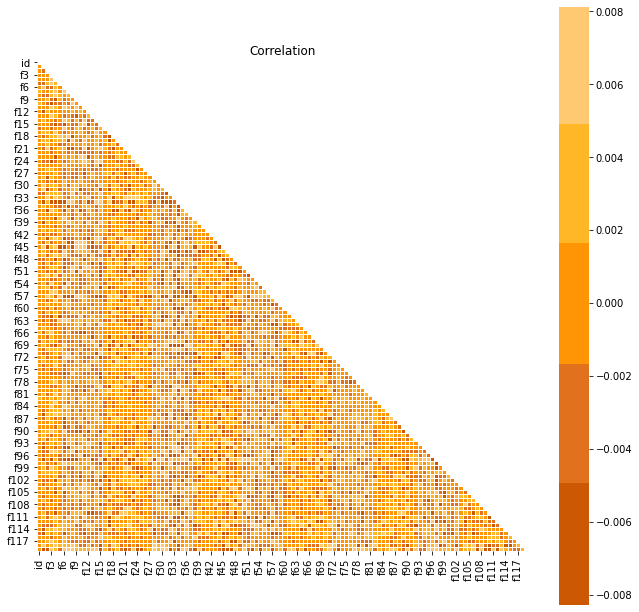

In [17]:
plt.figure(figsize=(11,11))
corr=df_train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap=custom_colors, robust=True, center=0,square=True, linewidths=.6)
plt.title('Correlation')
plt.show()

<p style="font-family: Trebuchet MS; line-height: 2; font-size: 16px; font-weight: bold; letter-spacing: 2px; text-align: center; color: #CC5803">All the 118 features are  weakly correlated.</p>
  

In [18]:
correlations_data = df_train.corr()['claim'].sort_values()
print(correlations_data.head(20),'\n')
print(correlations_data.tail(20),'\n')

f34    -0.021505
f57    -0.017977
f45    -0.017692
f21    -0.014342
f52    -0.012356
f32    -0.011715
f47    -0.010279
f2     -0.008261
f46    -0.007983
f38    -0.007938
f1     -0.007896
f15    -0.007251
f107   -0.007170
f54    -0.006909
f24    -0.006597
f25    -0.005970
f109   -0.005797
f73    -0.005664
f110   -0.005640
f112   -0.005592
Name: claim, dtype: float64 

f50      0.007724
f77      0.007752
f108     0.007854
f102     0.008004
f30      0.008094
f7       0.008270
f96      0.008495
f106     0.008914
f62      0.009862
f79      0.009912
f6       0.010200
f71      0.011572
f36      0.011640
f48      0.011988
f3       0.012016
f35      0.013777
f31      0.013903
f8       0.014311
f95      0.014771
claim    1.000000
Name: claim, dtype: float64 



Text(0.5, 1.0, 'Features correlation')

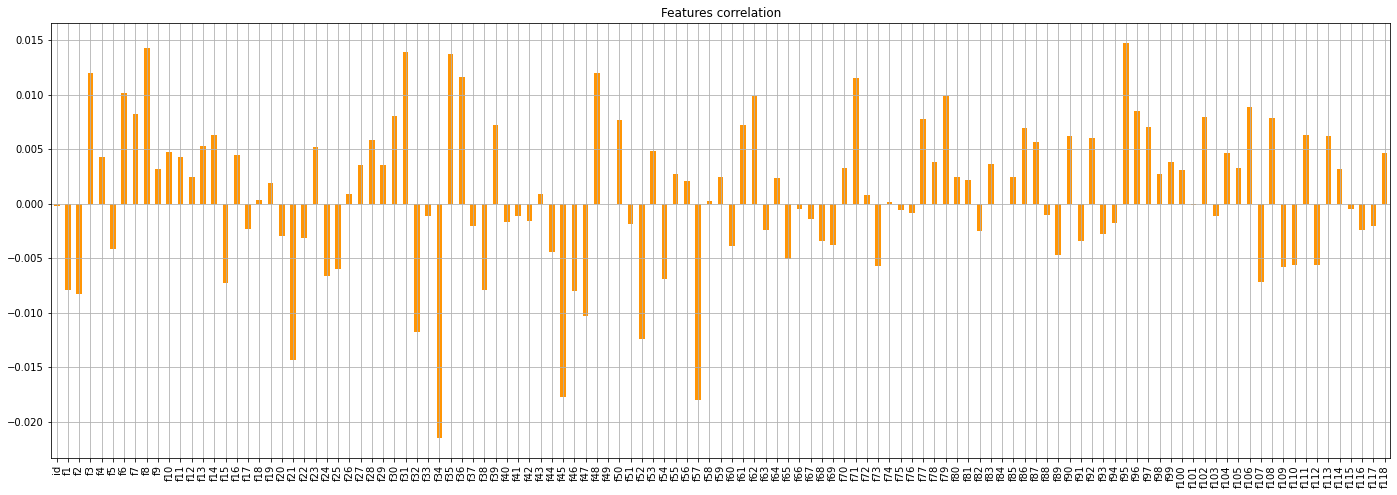

In [19]:
corr_feat = df_train.corr()
plt.figure(figsize=(24,8))
corr_feat["claim"][:-1].plot(kind="bar",grid=True,color='#FF9505')
plt.title("Features correlation")

In [20]:
df_train.drop(columns = 'id', inplace = True)
df_test.drop(columns = 'id', inplace = True)

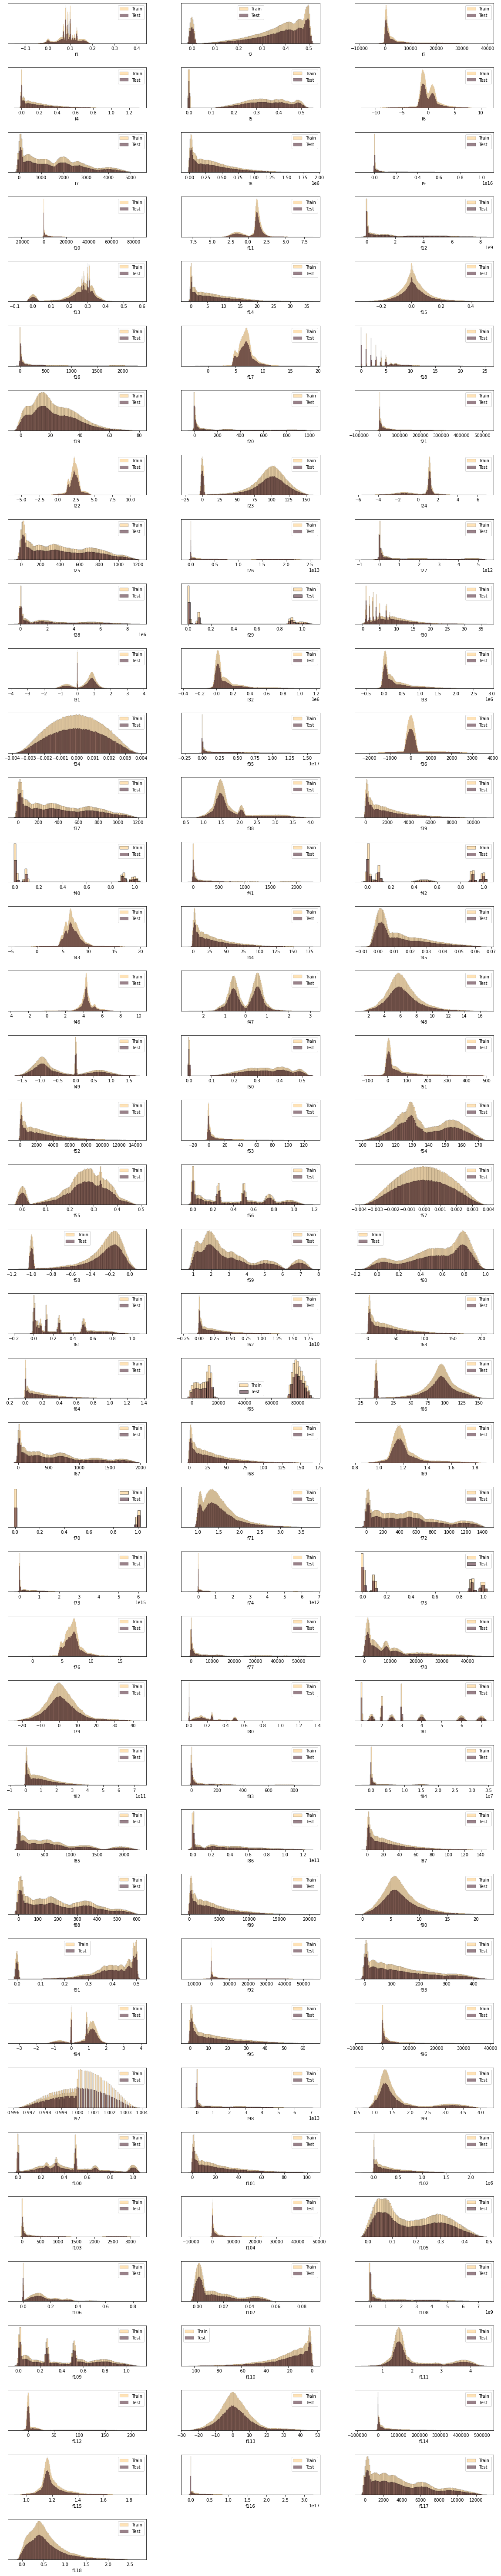

In [21]:
df = pd.concat([df_train.drop(["claim"], axis=1)])
df = df_train.columns[0:118]
plt.subplots(figsize=(20,160))
length = len(df)
for i, j in zip(df, range(length)):
    fig = plt.subplot((length/2), 3, j+1)
    plt.subplots_adjust(wspace=.25, hspace=.6)
    plt.yticks([])
    sns.histplot(x=df_train[i],alpha=0.5,color='#FFC971')
    sns.histplot(x=df_test[i],alpha=0.5,color='#370617')
    fig.legend(labels=('Train','Test'))

In [22]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df_train_n = pd.DataFrame(imputer.fit_transform(df_train),columns=df_train.columns,index=df_train.index)
df_test_n = pd.DataFrame(imputer.fit_transform(df_test),columns=df_test.columns,index=df_test.index)

In [23]:
# define dataset
X = df_train_n.drop(['claim'], axis=1)
y = df_train_n['claim']

In [24]:
from sklearn.model_selection import train_test_split

# creating dataset split for prediction
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42) # 80-20 split

# Checking split 
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (766335, 118)
y_train: (766335,)
X_test: (191584, 118)
y_test: (191584,)


In [25]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
ms.fit(X_train)
X_train = ms.transform(X_train)
X_test = ms.transform(X_test)

<h3 style="font-family: Trebuchet MS;background-color:#ffc501;color:brown;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;"><strong><centre>XGBoost ⏳</centre></strong></h3>

In [26]:
import xgboost as xgb
from xgboost import XGBClassifier
model1 = XGBClassifier(random_state=42,n_estimators= 500,learning_rate=0.05,eval_metric="auc",
                      max_depth=8,booster='gbtree',verbosity=0,tree_method = 'gpu_hist',task_type="GPU")
model1.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
              gamma=0, gpu_id=0, importance_type='gain',
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=8, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=2,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, task_type='GPU',
              tree_method='gpu_hist', validate_parameters=1, verbosity=0)

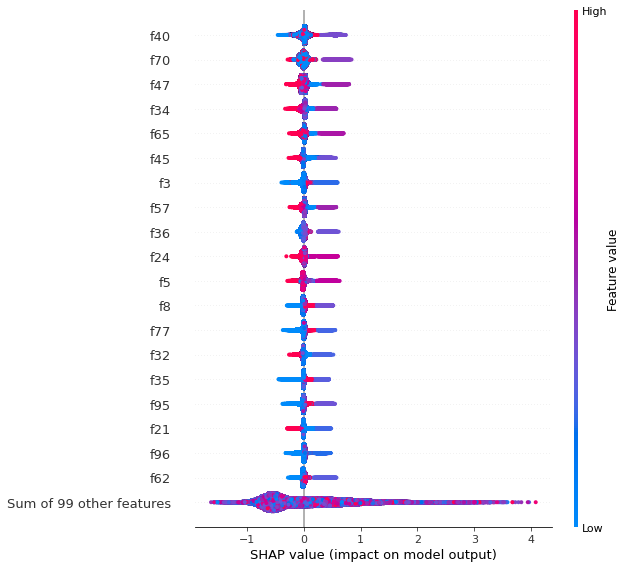

In [27]:
import shap
explainer = shap.Explainer(model1)
shap_values = explainer(X)
shap.plots.beeswarm(shap_values,max_display=20)

In [28]:
predicted1 = model1.predict(X)

Confusion Matrix
[[394513  85891]
 [126493 351022]]


Accuracy of XGBoost: 77.83 

              precision    recall  f1-score   support

         0.0       0.76      0.82      0.79    480404
         1.0       0.80      0.74      0.77    477515

    accuracy                           0.78    957919
   macro avg       0.78      0.78      0.78    957919
weighted avg       0.78      0.78      0.78    957919



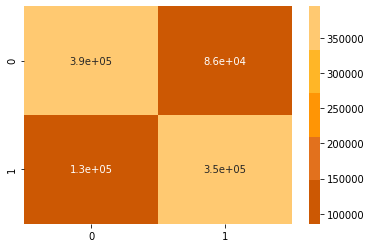

In [29]:
m1_cm = confusion_matrix(y, predicted1)
m1_acc_score = accuracy_score(y, predicted1)
print("Confusion Matrix")
print(m1_cm)
sns.heatmap(m1_cm, annot=True,cmap=custom_colors)
print("\n")
print("Accuracy of XGBoost:",round(m1_acc_score*100,2),'\n')
print(classification_report(y,predicted1))

<h3 style="font-family: Trebuchet MS;background-color:#ffc501;color:brown;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;"><strong><centre>LGBM ⏳</centre></strong></h3>

In [30]:
import lightgbm as lgbm  
model2 =  lgbm.LGBMClassifier(objective= 'binary',learning_rate = 0.05, max_depth = 3, 
                        device = 'gpu',n_estimators=500)
model2.fit(X_train,y_train)

LGBMClassifier(device='gpu', learning_rate=0.05, max_depth=3, n_estimators=500,
               objective='binary')

In [31]:
predicted2 = model2.predict(X)

Confusion Matrix
[[338082 142322]
 [302736 174779]]


Accuracy of LGBM: 53.54 

              precision    recall  f1-score   support

         0.0       0.53      0.70      0.60    480404
         1.0       0.55      0.37      0.44    477515

    accuracy                           0.54    957919
   macro avg       0.54      0.53      0.52    957919
weighted avg       0.54      0.54      0.52    957919



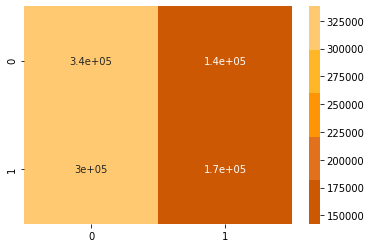

In [32]:
m2_cm = confusion_matrix(y, predicted2)
m2_acc_score = accuracy_score(y, predicted2)
print("Confusion Matrix")
print(m2_cm)
sns.heatmap(m2_cm, annot=True,cmap=custom_colors)
print("\n")
print("Accuracy of LGBM:",round(m2_acc_score*100,2),'\n')
print(classification_report(y,predicted2))

<h3 style="font-family: Trebuchet MS;background-color:#ffc501;color:brown;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;"><strong><centre>CatBoost ⏳</centre></strong></h3>

In [33]:
from catboost import CatBoostClassifier
model3 = CatBoostClassifier(random_state=42,max_depth = 3, iterations = 5000,learning_rate=0.005,
                           early_stopping_rounds=50,task_type="GPU")
model3.fit(X,y, verbose=1)

0:	learn: 0.6931229	total: 20.5ms	remaining: 1m 42s
1:	learn: 0.6931169	total: 31.8ms	remaining: 1m 19s
2:	learn: 0.6931084	total: 43ms	remaining: 1m 11s
3:	learn: 0.6930861	total: 53.9ms	remaining: 1m 7s
4:	learn: 0.6930778	total: 65.6ms	remaining: 1m 5s
5:	learn: 0.6930590	total: 76.9ms	remaining: 1m 4s
6:	learn: 0.6930510	total: 88ms	remaining: 1m 2s
7:	learn: 0.6930429	total: 99.5ms	remaining: 1m 2s
8:	learn: 0.6930189	total: 110ms	remaining: 1m
9:	learn: 0.6929982	total: 121ms	remaining: 1m
10:	learn: 0.6929753	total: 136ms	remaining: 1m 1s
11:	learn: 0.6929552	total: 146ms	remaining: 1m
12:	learn: 0.6929318	total: 156ms	remaining: 59.8s
13:	learn: 0.6929201	total: 166ms	remaining: 59.2s
14:	learn: 0.6928999	total: 178ms	remaining: 59.2s
15:	learn: 0.6928758	total: 188ms	remaining: 58.7s
16:	learn: 0.6928541	total: 198ms	remaining: 58.1s
17:	learn: 0.6928454	total: 209ms	remaining: 57.8s
18:	learn: 0.6928362	total: 222ms	remaining: 58.2s
19:	learn: 0.6928137	total: 232ms	remaining

In [34]:
predicted3 = model3.predict(X)

Confusion Matrix
[[381510  98894]
 [187541 289974]]


Accuracy of CatBoost: 70.1 

              precision    recall  f1-score   support

         0.0       0.67      0.79      0.73    480404
         1.0       0.75      0.61      0.67    477515

    accuracy                           0.70    957919
   macro avg       0.71      0.70      0.70    957919
weighted avg       0.71      0.70      0.70    957919



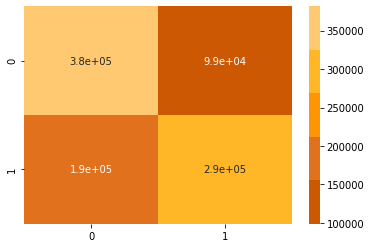

In [35]:
m3_cm = confusion_matrix(y, predicted3)
m3_acc_score = accuracy_score(y, predicted3)
print("Confusion Matrix")
print(m3_cm)
sns.heatmap(m3_cm, annot=True,cmap=custom_colors)
print("\n")
print("Accuracy of CatBoost:",round(m3_acc_score*100,2),'\n')
print(classification_report(y,predicted3))

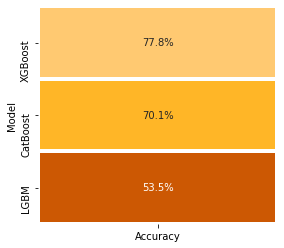

In [36]:
model_eval = pd.DataFrame({'Model': ['XGBoost','LGBM','CatBoost'], 'Accuracy': [m1_acc_score,
                    m2_acc_score,m3_acc_score]})
model_eval = model_eval.set_index('Model').sort_values(by='Accuracy',ascending=False)
fig = plt.figure(figsize=(12, 4))
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.8, hspace=0.8)
ax0 = fig.add_subplot(gs[0, 0])
sns.heatmap(model_eval,cmap=custom_colors, annot=True,fmt=".1%", linewidths=4,cbar=False,ax=ax0)
plt.show()

<h3 style="font-family: Trebuchet MS;background-color:#ffc501;color:brown;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;"><strong><centre>StackingCVClassifier ⏳</centre></strong></h3>

Reference: https://rasbt.github.io/mlxtend/user_guide/classifier/StackingCVClassifier/

In [37]:
from mlxtend.classifier import StackingCVClassifier
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10,random_state=42)
clr_models = (model1,model2,model3)
model_stack = StackingCVClassifier(classifiers=clr_models, meta_classifier=model1, 
                            use_features_in_secondary=True,shuffle=False,cv=kfold,random_state=42)
model_stack.fit(X, y)

0:	learn: 0.6931232	total: 11.5ms	remaining: 57.6s
1:	learn: 0.6931166	total: 21.8ms	remaining: 54.4s
2:	learn: 0.6931060	total: 32.1ms	remaining: 53.5s
3:	learn: 0.6930845	total: 41.9ms	remaining: 52.3s
4:	learn: 0.6930624	total: 52.1ms	remaining: 52s
5:	learn: 0.6930378	total: 62.7ms	remaining: 52.2s
6:	learn: 0.6930171	total: 72.9ms	remaining: 52s
7:	learn: 0.6929962	total: 82.7ms	remaining: 51.6s
8:	learn: 0.6929727	total: 92.9ms	remaining: 51.5s
9:	learn: 0.6929519	total: 103ms	remaining: 51.4s
10:	learn: 0.6929331	total: 113ms	remaining: 51.3s
11:	learn: 0.6929096	total: 123ms	remaining: 51.2s
12:	learn: 0.6928878	total: 134ms	remaining: 51.3s
13:	learn: 0.6928816	total: 144ms	remaining: 51.3s
14:	learn: 0.6928611	total: 154ms	remaining: 51.2s
15:	learn: 0.6928533	total: 165ms	remaining: 51.2s
16:	learn: 0.6928306	total: 175ms	remaining: 51.2s
17:	learn: 0.6928101	total: 189ms	remaining: 52.4s
18:	learn: 0.6927895	total: 200ms	remaining: 52.3s
19:	learn: 0.6927823	total: 209ms	re

StackingCVClassifier(classifiers=(XGBClassifier(base_score=0.5,
                                                booster='gbtree',
                                                colsample_bylevel=1,
                                                colsample_bynode=1,
                                                colsample_bytree=1,
                                                eval_metric='auc', gamma=0,
                                                gpu_id=0,
                                                importance_type='gain',
                                                interaction_constraints='',
                                                learning_rate=0.05,
                                                max_delta_step=0, max_depth=8,
                                                min_child_weight=1, missing=nan,
                                                monotone_constraints='()',
                                                n_estimators=500, n_job...
     

In [38]:
predicted_st = model_stack.predict(X)

In [39]:
y_pred_stack = model_stack.predict(df_test)

In [41]:
df_subm['claim'] = y_pred_stack
df_subm

id  claim
0        957919    0.0
1        957920    0.0
2        957921    0.0
3        957922    0.0
4        957923    0.0
...         ...    ...
493469  1451388    0.0
493470  1451389    0.0
493471  1451390    0.0
493472  1451391    0.0
493473  1451392    0.0

[493474 rows x 2 columns]

In [42]:
df_subm.to_csv('submission_stack.csv', index=False)

<h3 style="font-family: Trebuchet MS;background-color:#ffc501;color:brown;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;"><strong><centre>Work in progress</centre></strong></h3>